In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/charan/Documents/Learning/GitHub/MLprojects/ARIMA_model/data.csv',
                   names=['Date','UnemploymentRate'])

In [3]:
test_data = pd.read_csv('/Users/charan/Documents/Learning/GitHub/MLprojects/ARIMA_model/test_data.csv',
                       names=['Date','UnemploymentRate'])

In [4]:
data.tail()

,Date,UnemploymentRate
727,8/1/08,6.1
728,9/1/08,6.1
729,10/1/08,6.5
730,11/1/08,6.8
731,12/1/08,7.3


In [5]:
# data = data[:round(data.shape[0]*0.8)]

In [6]:
# data_test = data[round(data.shape[0]*0.8):]

In [7]:
import matplotlib.pyplot as plt

<AxesSubplot:>

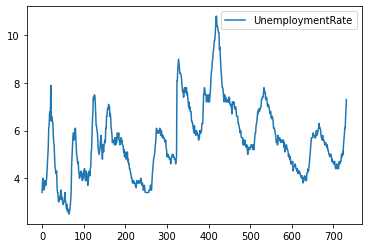

In [8]:
data.plot(kind='line')

In [9]:
data.UnemploymentRate.diff() ###diff(number)

0      NaN
1      0.4
2      0.2
3     -0.1
4     -0.4
      ... 
727    0.3
728    0.0
729    0.4
730    0.3
731    0.5
Name: UnemploymentRate, Length: 732, dtype: float64

In [10]:
data.UnemploymentRate

0      3.4
1      3.8
2      4.0
3      3.9
4      3.5
      ... 
727    6.1
728    6.1
729    6.5
730    6.8
731    7.3
Name: UnemploymentRate, Length: 732, dtype: float64

In [11]:
data['firstDiff'] = data.UnemploymentRate.diff().fillna(0)

<AxesSubplot:>

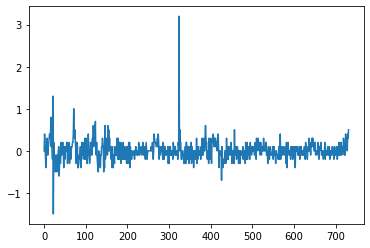

In [12]:
data.firstDiff.plot()

In [30]:
#data is stationary after differencing once

In [31]:
from statsmodels.tsa.stattools import adfuller

In [53]:
# help(adfuller)

In [45]:
result = adfuller(data.UnemploymentRate)
result
adf_stat_raw, pval_raw, lags_raw, obsrvtns_raw = result[:4]
adf_stat_raw, pval_raw, lags_raw, obsrvtns_raw
# print()


(-3.037014406706925, 0.031579345100702205, 12, 719)

In [50]:
result[4] #5% is the critical val

{'1%': -3.439477677285233,
 '5%': -2.865568186630048,
 '10%': -2.5689150720653977}

In [47]:
# If the p-value is less than or equal to 0.05 or 
# the absolute value of the test statistics is greater than the critical value, 
# you reject H0 and conclude that the time series is stationary.

In [ ]:
# visually I'm gonna reject null hypothesis at first difference but can somone explain why this should not be 
#rejected

In [48]:
result2 = adfuller(data.firstDiff)
adf_stat_diff, pval_diff, lags_diff, obsrvtns_diff = result2[:4]
adf_stat_diff, pval_diff, lags_diff, obsrvtns_diff

(-8.077966595633509, 1.4877381212309425e-12, 11, 720)

In [ ]:
##

In [51]:
result2[4] #5% is the critical val

{'1%': -3.439464954327953,
 '5%': -2.8655625802683473,
 '10%': -2.5689120852623457}

In [ ]:
##kpss test

In [56]:
from statsmodels.tsa.stattools import kpss

In [62]:
result_kpss = kpss(data.UnemploymentRate)
kpss_stat, kpss_pval, kpss_lags = result_kpss[:3]
kpss_stat, kpss_pval, kpss_lags

(0.6730092019333949, 0.015999163460600464, 17)

In [63]:
result_kpss[3]['5%']

0.463

In [64]:
result_kpss_2 = kpss(data.firstDiff.fillna(0))
kpss_stat2, kpss_pval2, kpss_lags2 = result_kpss_2[:3]
kpss_stat2, kpss_pval2, kpss_lags2

/usr/local/venv/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.03135691797194356, 0.1, 12)

In [65]:
result_kpss_2[3]['5%']

0.463

In [ ]:
#I'm gonna try forecasting with raw data as well, tstat and pval for raw data reject null hypothesis it seems

In [14]:
# np.log(np.e)

In [15]:
# np.log(data['UnemploymentRate']).diff(1).plot()

In [16]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [17]:
acf_vals_raw = acf(data['UnemploymentRate'])
np.round(acf_vals_raw,2), acf_vals_raw.shape

(array([1.  , 0.98, 0.97, 0.95, 0.92, 0.89, 0.86, 0.83, 0.8 , 0.77, 0.73,
        0.7 , 0.67, 0.64, 0.62, 0.6 , 0.57, 0.56, 0.54, 0.52, 0.5 , 0.49,
        0.47, 0.46, 0.44, 0.43, 0.42, 0.41, 0.4 ]),
 (29,))

Text(0.5, 1.0, 'Autocorrelation with raw data')

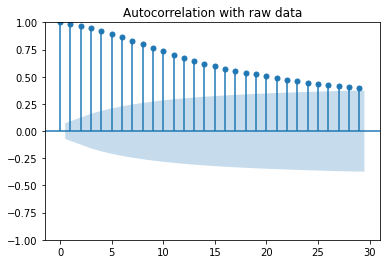

In [18]:
plot_acf(data.UnemploymentRate);
plt.title('Autocorrelation with raw data')

In [19]:
acf_vals = acf(data['firstDiff'])
np.round(acf_vals,2), acf_vals.shape

(array([ 1.  ,  0.06,  0.25,  0.15,  0.12,  0.13,  0.03,  0.02,  0.03,
         0.02, -0.1 ,  0.02, -0.14, -0.04, -0.04, -0.05, -0.05, -0.04,
        -0.02, -0.  , -0.01, -0.04, -0.02, -0.02, -0.13, -0.01, -0.07,
         0.01, -0.03]),
 (29,))

Text(0.5, 1.0, 'Autocorrelation with diff data')

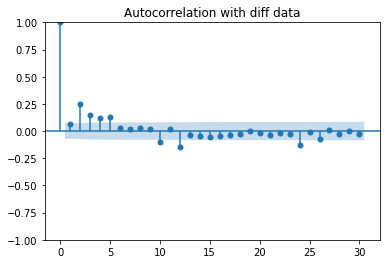

In [20]:
plot_acf(data['firstDiff'],lags=30); #add semi colon to stop plotting twice, weird!
plt.title('Autocorrelation with diff data')

In [21]:
# 2nd month there's correlation of 0.25; 3rd,4th,5th and 12th too have correlation values- outside blue shaded area

In [22]:
# import itertools

In [23]:
# list(itertools.product([0,1,2],[0,1,2],[0,1,2]))
# list(itertools.combinations([0,1,2],3))

In [24]:
pacf_values_raw = pacf(data.UnemploymentRate)
np.round(pacf_values_raw,2), pacf_values_raw.shape

(array([ 1.  ,  0.99, -0.03, -0.22, -0.14, -0.11, -0.08,  0.02,  0.05,
        -0.  , -0.05,  0.09, -0.03,  0.11,  0.05, -0.02, -0.02,  0.03,
        -0.02, -0.01, -0.02, -0.04,  0.07, -0.05, -0.01,  0.15,  0.01,
         0.02, -0.07]),
 (29,))

/usr/local/venv/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 1.0, 'Partial Autocorr with raw data')

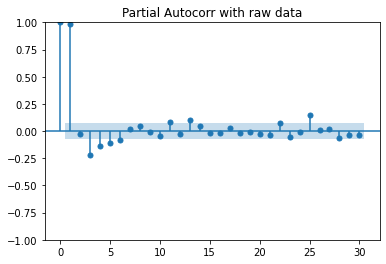

In [25]:
plot_pacf(data.UnemploymentRate, lags =30);
plt.title('Partial Autocorr with raw data')

In [26]:
pacf_values = pacf(data.firstDiff)
np.round(pacf_values,2), pacf_values.shape

(array([ 1.  ,  0.06,  0.25,  0.13,  0.06,  0.06, -0.03, -0.05, -0.  ,
         0.01, -0.12,  0.02, -0.11, -0.02,  0.03,  0.01, -0.02,  0.  ,
         0.01,  0.02, -0.  , -0.03, -0.04, -0.01, -0.14,  0.  , -0.01,
         0.05,  0.01]),
 (29,))

/usr/local/venv/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 1.0, 'Partial Autocorr with diff data')

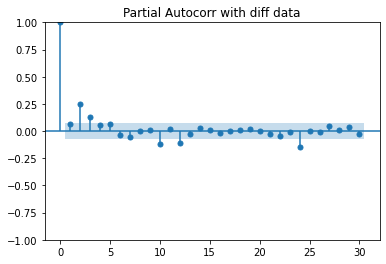

In [27]:
plot_pacf(data.firstDiff, lags =30);
plt.title('Partial Autocorr with diff data')

In [28]:
#2nd period has partial corr value of 0.25

In [29]:
## Let's try ARIMA model of order (p,i,q) with p=2 (pacf), i=1 (first diff), q=2 (acf)
## we can also try (2,0,2),(2,0,5) & (2,1,5)

In [66]:
#ARIMA model

In [67]:
# from statsmodels.tsa.arima_model import ARIMA this has been depracated looks like

In [69]:
# help(ARIMA)

In [70]:
from statsmodels.tsa.arima.model import ARIMA

In [90]:
from statsmodels.graphics.tsaplots import plot_predict

In [78]:
model_205 = ARIMA(data.UnemploymentRate,order=(2,0,5))
model_205 = model_205.fit()
model_205.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       UnemploymentRate   No. Observations:                  732
Model:                 ARIMA(2, 0, 5)   Log Likelihood                  43.637
Date:                Mon, 18 Jul 2022   AIC                            -69.274
Time:                        22:33:25   BIC                            -27.912
Sample:                             0   HQIC                           -53.318
                                - 732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5855      0.463     12.065      0.000       4.678       6.493
ar.L1          1.7153      0.123     13.987      0.000       1.475       1.956
ar.L2         -0.7265      0.120     -6.057      0.000      -0.962      -0.491
ma.L1         -0.7282      0.134     -5.415      0.000      -0.992      -0.465
ma.L2          0.2232      0.046      4.810      0.000       0.132       0.314
ma.L3         -0.0393      0.071     -0.555      0.579      -0.178       0.099
ma.L4          0.0450      0.060      0.750      0.453      -0.073       0.163
ma.L5          0.0296      0.055      0.537      0.591      -0.078       0.138
sigma2         0.0517      0.001     69.071      0.000       0.050       0.053
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             88913.95
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             3.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        56.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
# help(ARIMA)

In [79]:
model_215 = ARIMA(data.UnemploymentRate,order=(2,1,5))
model_215 = model_215.fit()
model_215.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       UnemploymentRate   No. Observations:                  732
Model:                 ARIMA(2, 1, 5)   Log Likelihood                  43.676
Date:                Mon, 18 Jul 2022   AIC                            -71.352
Time:                        22:33:55   BIC                            -34.597
Sample:                             0   HQIC                           -57.172
                                - 732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3009      0.116     -2.598      0.009      -0.528      -0.074
ar.L2          0.6375      0.111      5.757      0.000       0.420       0.855
ma.L1          0.3196      0.120      2.653      0.008       0.084       0.556
ma.L2         -0.4217      0.114     -3.689      0.000      -0.646      -0.198
ma.L3          0.1865      0.041      4.554      0.000       0.106       0.267
ma.L4          0.0141      0.076      0.185      0.853      -0.135       0.163
ma.L5          0.0811      0.050      1.638      0.101      -0.016       0.178
sigma2         0.0518      0.001     69.003      0.000       0.050       0.053
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             84817.97
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             3.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        55.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
model_212 = ARIMA(data.UnemploymentRate,order=(2,1,2))
model_212 = model_212.fit()
model_212.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       UnemploymentRate   No. Observations:                  732
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  37.999
Date:                Mon, 18 Jul 2022   AIC                            -65.998
Time:                        22:35:32   BIC                            -43.026
Sample:                             0   HQIC                           -57.135
                                - 732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6567      0.216      3.047      0.002       0.234       1.079
ar.L2          0.0643      0.195      0.329      0.742      -0.318       0.447
ma.L1         -0.6517      0.215     -3.029      0.002      -1.073      -0.230
ma.L2          0.1506      0.168      0.898      0.369      -0.178       0.479
sigma2         0.0528      0.001     83.193      0.000       0.052       0.054
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             86328.47
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             3.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        55.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
model_202 = ARIMA(data.UnemploymentRate,order=(2,0,2))
model_202 = model_202.fit()
model_202.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       UnemploymentRate   No. Observations:                  732
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  42.618
Date:                Mon, 18 Jul 2022   AIC                            -73.236
Time:                        22:36:15   BIC                            -45.662
Sample:                             0   HQIC                           -62.599
                                - 732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5876      0.454     12.309      0.000       4.698       6.477
ar.L1          1.7720      0.047     37.546      0.000       1.680       1.865
ar.L2         -0.7810      0.047    -16.635      0.000      -0.873      -0.689
ma.L1         -0.7834      0.058    -13.447      0.000      -0.898      -0.669
ma.L2          0.2040      0.032      6.419      0.000       0.142       0.266
sigma2         0.0518      0.001     81.681      0.000       0.051       0.053
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             90123.36
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             3.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        56.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
##2,0,2 has lowest AIC val (-73)

In [84]:
#lets plot

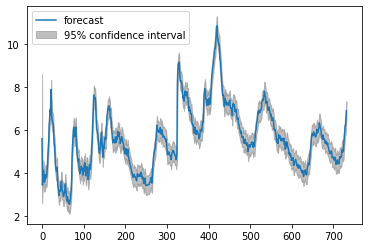

In [101]:
# model_202.plot_predict(dynamic=False)
# fig, ax = plt.subplots(2,2,figsize = (8,12))
plot_predict(model_202,dynamic=False);

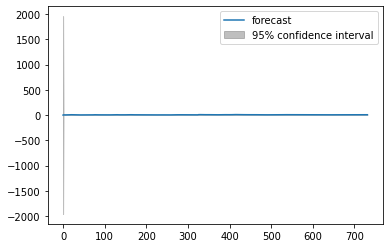

In [98]:
plot_predict(model_212);

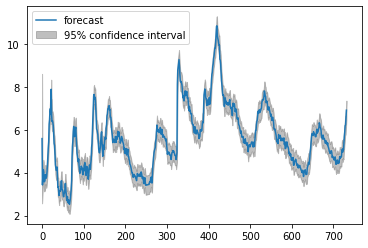

In [102]:
plot_predict(model_205);

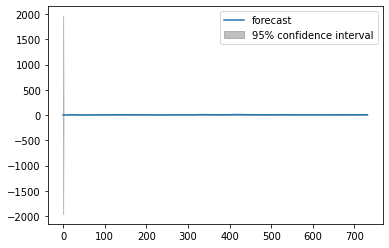

In [103]:
plot_predict(model_215);